<a href="https://colab.research.google.com/github/Anshika91/Deep_Learning/blob/main/image_classification_using_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as tensorflow_hub
import os
import numpy as np
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings('ignore')

In [10]:
datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True , split=['train' , 'test'])

In [11]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [12]:
train , info_train = tfds.load(name='mnist' , with_info=True, split='test')


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


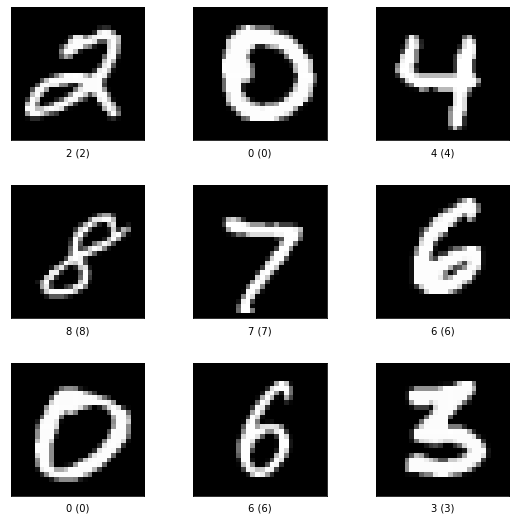

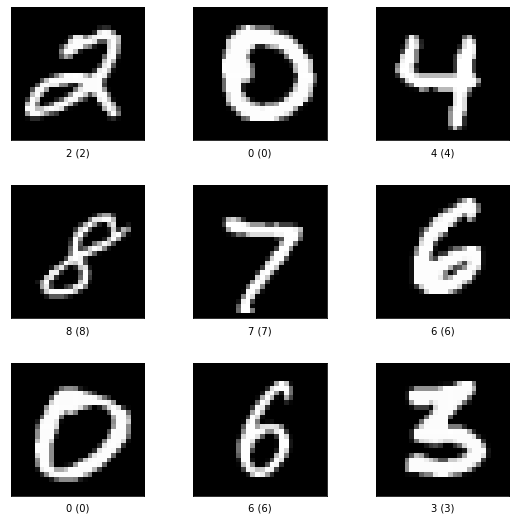

In [13]:
tfds.show_examples(info_train,train)

In [14]:
def scale(image,label):
  image = tf.cast(image , tf.float32)
  image /= 255.0
  return tf.image.resize(image,[224,224]), tf.one_hot(label,3)

In [15]:
def get_dataset(batch_size=32):
  train_dataset_scaled = datasets[0].map(scale).shuffle(1000).batch(batch_size)
  test_dataset_scaled = datasets[0].map(scale).batch(batch_size)
  return train_dataset_scaled, test_dataset_scaled

In [16]:
train_dataset , test_dataset = get_dataset()

In [17]:
train_dataset.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [18]:
len(list(datasets[0]))

60000